In [1]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [3]:
import opendatasets as od
import pandas as pd
od.download(
    "https://www.kaggle.com/datasets/ubitquitin/geolocation-geoguessr-images-50k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thekatle
Your Kaggle Key: ··········


100%|██████████| 6.66G/6.66G [01:01<00:00, 116MB/s]


In [4]:
#you can sign up for a Kaggle account to obtain the .JSON file that contains your key
#{"username":"thekatle","key":"6414373099739e188807c1db9aa4c30c"}

In [5]:
#Note: we can probably create a generic Kaggle account for use for this project?
import os

root = '/content/geolocation-geoguessr-images-50k/compressed_dataset'
#print(os.listdir(root))

kaggleDict = {}
for subdir, dirs, files in os.walk(root):    
    for file in files:
        key, value = os.path.basename(subdir), file  #Get basefolder name & file name
        kaggleDict.setdefault(key, []).append(value)          #Form DICT

#Double checking the value
#Canada should have 1382 files as seen on the website

In [6]:
kaggleDict_size = dict.fromkeys(list(kaggleDict.keys()))
for country in kaggleDict:
    data_size = len(kaggleDict[country])
    # if (data_size > 100): #drop countries where there is less than 100 images
    kaggleDict_size[country] = data_size

#print(type(kaggleDict_size['Canada']))

<class 'int'>


In [7]:
#Lets try with some classes first
#e.g. Mexico, United States, Canada
import random
random.seed(10)
numSelect = 20 #must first ensure that the country has that many files! call the dict

canadaSet = kaggleDict['Canada']
mexicoSet = kaggleDict['Mexico']
usSet = kaggleDict['United States']

for img in range(len(canadaSet)):
  canadaSet[img] = root+ '/Canada/'+ canadaSet[img]
for img in range(len(mexicoSet)):
  mexicoSet[img] = root+ '/Mexico/'+ mexicoSet[img]
for img in range(len(usSet)):
  usSet[img] = root+ '/United States/'+ usSet[img]
  
canadaFiles = random.sample(canadaSet,numSelect)
usFiles = random.sample(usSet,numSelect)
mexicoFiles = random.sample(mexicoSet,numSelect)


In [8]:
print(len(canadaFiles))
print(len(usFiles))
print(len(mexicoFiles))

20
20
20


In [9]:
import torch
import glob
from torch.utils.data import random_split

#countries will be our class name
#countries = os.listdir(root)
countries = ['Canada','Mexico','United States']
#print(countries)
num_class = len(countries)

img_files = canadaFiles+mexicoFiles+usFiles

# img_files = glob.glob(root+'/*/*.jpg',recursive=True)
print(len(img_files))
idx_to_class = {i:j for i, j in enumerate(countries)}
print(idx_to_class)
class_to_idx = {value:key for key,value in idx_to_class.items()}
print(class_to_idx)

#random split
train_idx,val_idx,test_idx=random_split(img_files, [0.5, 0.3, 0.2], generator=torch.Generator().manual_seed(42))
    
train_list=[img_files[i] for i in train_idx.indices]
test_list=[img_files[i] for i in test_idx.indices]
val_list=[img_files[i] for i in val_idx.indices]

print(len(train_idx.indices),len(test_idx.indices),len(val_idx.indices))
print(len(train_list),len(test_list),len(val_list))   

60
{0: 'Canada', 1: 'Mexico', 2: 'United States'}
{'Canada': 0, 'Mexico': 1, 'United States': 2}
30 12 18
30 12 18


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [10]:
import os
geoguessr_small = '/content/geoguessr_small'

if not os.path.isdir(geoguessr_small):
  os.makedirs(geoguessr_small)

train_path = geoguessr_small+'/train_set'
test_path = geoguessr_small+'/test_set'
valid_path = geoguessr_small+'/validation_set'

if not os.path.isdir(train_path):
  os.makedirs(train_path)

if not os.path.isdir(test_path):
  os.makedirs(test_path)

if not os.path.isdir(valid_path):
  os.makedirs(valid_path)


In [11]:
import shutil
root_dir = '/content/gdrive/MyDrive/Colab Notebooks/project/geoguessr_small'

train_path = geoguessr_small+'/train_set'
test_path = geoguessr_small+'/test_set'
valid_path = geoguessr_small+'/validation_set'

for subdir, dirs, files in os.walk(root):
    for file in files:
        if 'Canada' in subdir or 'United States' in subdir or 'Mexico' in subdir:
          for i in range(len(train_list)):
            if train_list[i] == os.path.join(subdir,file):
              if 'Canada' in subdir:
                class_type = 'Canada'
              elif 'United States' in subdir:
                class_type = 'United States'
              else:
                class_type='Mexico'
              #print(class_type)

              path_name = os.path.join(train_path,class_type)
              #print(path_name)
              #print(train_list[i])

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(train_list[i], path_name)

          for i in range(len(test_list)):
            if test_list[i] == os.path.join(subdir,file):
              if 'Canada' in subdir:
                class_type = 'Canada'
              elif 'United States' in subdir:
                class_type = 'United States'
              else:
                class_type='Mexico'
              path_name = os.path.join(test_path,class_type)
              #print(path_name)

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(test_list[i], path_name)

          for i in range(len(val_list)):
            if val_list[i] == os.path.join(subdir,file):
              if 'Canada' in subdir:
                class_type = 'Canada'
              elif 'United States' in subdir:
                class_type = 'United States'
              else:
                class_type='Mexico'
              path_name = os.path.join(valid_path,class_type)
              #print(path_name)

              if not os.path.exists(path_name):
                os.makedirs(path_name)
              shutil.copy(val_list[i], path_name)

In [14]:
import torchvision
import torchvision.transforms as transforms
import torch.utils.data
import torchvision.datasets as datasets
#seems the default size is 1536 x 662 from Kaggle

dataset_transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomResizedCrop(size=(662)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

geoguessr_small = '/content/geoguessr_small'
train_path = geoguessr_small+'/train_set'
test_path = geoguessr_small+'/test_set'
valid_path = geoguessr_small+'/validation_set'

dataset = datasets.ImageFolder(root=geoguessr_small, transform=dataset_transforms)

train_dataset = torchvision.datasets.ImageFolder(train_path,transform=dataset_transforms)
val_dataset = torchvision.datasets.ImageFolder(valid_path,transform=dataset_transforms)
test_dataset = torchvision.datasets.ImageFolder(test_path,transform=dataset_transforms)

batch_size = 30;
num_workers = 0;

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

valid_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

print("Done")

Done


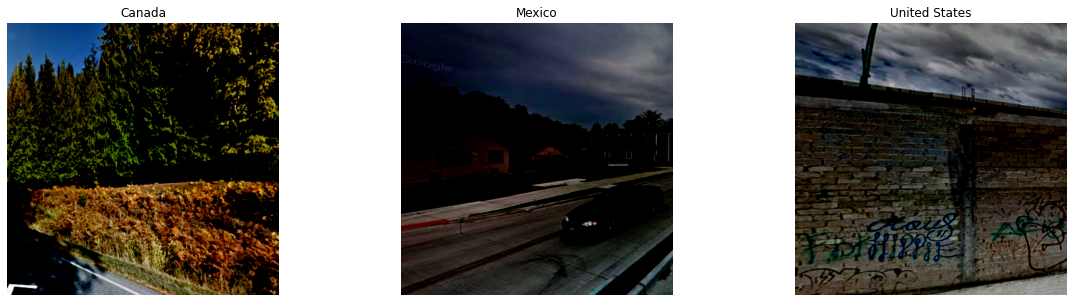

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
classes = ['Canada','Mexico','United States']
fig, axis = plt.subplots(1, len(classes), figsize=(20, 5))

for i in range(len(classes)):
    # Get the indices of the images that belong to the current class
    indices = np.where(np.array(dataset.targets) == i)[0]
    # Choose a random index from the indices
    idx = np.random.choice(indices)
    # Get the corresponding image and label
    img, label = dataset[idx]
    # Plot the image and label it with the class name
    axis[i].imshow(img.permute(1, 2, 0))
    axis[i].set_title(classes[label])
    axis[i].axis("off")

plt.show()


In [51]:
# Create a neural net class
class CNN(nn.Module):
    # Defining the Constructor
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        
        # In the init function, we define each layer we will use in our model
        
        # Our images are RGB, so we have input channels = 3. 
        # We will apply 12 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=5, stride=2, padding=0)
        
        # A second convolutional layer takes 12 input channels, and generates 24 outputs
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=8, stride=2, padding=0)
        
        # We in the end apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(3,3)
        
        # We need to flatten these in order to feed them to a fully-connected layer
        self.fc1 = nn.Linear(in_features=10*17*17, out_features=200)
        self.fc2 = nn.Linear(in_features=200, out_features=num_classes)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        #print('Shape from Conv1x: '+ str(x.shape))
        x = self.pool(F.relu(self.conv2(x)))
        #print('Shape from Conv2x: '+ str(x.shape))

        x = x.view(-1, 10*17*17)
        #print('Shape going into fc1: ' + str(x.shape))

        x = F.relu(self.fc1(x))

        #print('Shape going into fc2: '+ str(x.shape))
        x = self.fc2(x)
        return x

In [20]:
def train(model,train_dataset,val_dataset, batch_size=64, learning_rate = 0.001, num_epochs=30):
    torch.manual_seed(10)
    
    print('Beginning training...')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True)

    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        
        for imgs, labels in iter(train_loader):

            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
              
            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model,train=False))  # compute validation accuracy
            
            n += 1

        #Print training and validation accuracy for each epoch
        print(("Epoch {}: Train acc: {} |" + "Validation acc: {}").format(epoch, train_acc[epoch], val_acc[epoch]))


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [36]:
def get_accuracy(model, train=False):
    if train:
        data_loader = train_loader
    else:
        data_loader = valid_loader

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [18]:
use_cuda = True

Beginning training...
Epoch 0: Train acc: 0.4666666666666667 |Validation acc: 0.3333333333333333
Epoch 1: Train acc: 0.4666666666666667 |Validation acc: 0.3333333333333333
Epoch 2: Train acc: 0.4666666666666667 |Validation acc: 0.3333333333333333
Epoch 3: Train acc: 0.5 |Validation acc: 0.3888888888888889
Epoch 4: Train acc: 0.6 |Validation acc: 0.3333333333333333
Epoch 5: Train acc: 0.4666666666666667 |Validation acc: 0.3333333333333333
Epoch 6: Train acc: 0.6 |Validation acc: 0.3888888888888889
Epoch 7: Train acc: 0.5 |Validation acc: 0.4444444444444444
Epoch 8: Train acc: 0.6666666666666666 |Validation acc: 0.3333333333333333
Epoch 9: Train acc: 0.6333333333333333 |Validation acc: 0.2222222222222222
Epoch 10: Train acc: 0.6 |Validation acc: 0.3333333333333333
Epoch 11: Train acc: 0.5 |Validation acc: 0.2777777777777778
Epoch 12: Train acc: 0.5333333333333333 |Validation acc: 0.2222222222222222
Epoch 13: Train acc: 0.6 |Validation acc: 0.3333333333333333
Epoch 14: Train acc: 0.633333

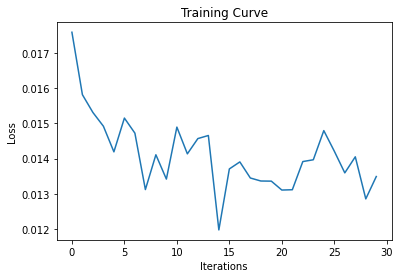

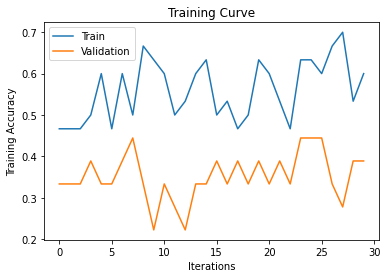

Final Training Accuracy: 0.6
Final Validation Accuracy: 0.3888888888888889


In [21]:
#yikes
test_model = CNN()
if use_cuda and torch.cuda.is_available():
  test_model.cuda()
  print("CUDA available, training on GPU")

train(test_model, train_dataset, val_dataset,batch_size=64,learning_rate=0.001,num_epochs=30)

In [50]:
#going to try to subset the data directly
root_dir = '/content/geolocation-geoguessr-images-50k/compressed_dataset'

dataset_transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomResizedCrop(size=(662)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = datasets.ImageFolder(root=root_dir, transform=dataset_transforms)

train_size = int(len(dataset)*0.5)
valid_size = int(len(dataset)*0.3)
test_size = int(len(dataset)-train_size-valid_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

batch_size = 30;
num_workers = 1;

countries = dataset.classes

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

valid_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

print("Done")

Done


In [61]:
#re-attempt the smaller random subset size

# Select a random subset of the indices
subset_size = 100
train_small_indices = random.sample(range(len(dataset)), subset_size)
valid_small_indices = random.sample(range(len(dataset)), subset_size)

# Create a subset dataset
subset_train_dataset = torch.utils.data.Subset(dataset, train_small_indices)
subset_valid_dataset = torch.utils.data.Subset(dataset, valid_small_indices)
small_train_loader = torch.utils.data.DataLoader(subset_train_dataset, batch_size=30, num_workers=1, shuffle=True)
small_valid_loader = torch.utils.data.DataLoader(subset_valid_dataset, batch_size=30, num_workers=1, shuffle=True)

In [62]:
def get_accuracy_subset(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [63]:
def train_subset(model,subset_train_dataset,subset_val_dataset, batch_size=64, learning_rate = 0.001, num_epochs=30):
    torch.manual_seed(10)
    
    print('Beginning training...')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    subset_train_loader = torch.utils.data.DataLoader(subset_train_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True)

    subset_val_loader = torch.utils.data.DataLoader(subset_val_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        
        for imgs, labels in iter(subset_train_loader):

            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
              
            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_subset(model, subset_train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy_subset(model,subset_val_loader))  # compute validation accuracy
            
            n += 1

        #Print training and validation accuracy for each epoch
        print(("Epoch {}: Train acc: {} |" + "Validation acc: {}").format(epoch, train_acc[epoch], val_acc[epoch]))


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

Beginning training...
Epoch 0: Train acc: 0.26 |Validation acc: 0.26
Epoch 1: Train acc: 0.26 |Validation acc: 0.26
Epoch 2: Train acc: 0.26 |Validation acc: 0.26
Epoch 3: Train acc: 0.26 |Validation acc: 0.26
Epoch 4: Train acc: 0.26 |Validation acc: 0.26
Epoch 5: Train acc: 0.26 |Validation acc: 0.26
Epoch 6: Train acc: 0.11 |Validation acc: 0.07
Epoch 7: Train acc: 0.09 |Validation acc: 0.05
Epoch 8: Train acc: 0.09 |Validation acc: 0.05
Epoch 9: Train acc: 0.1 |Validation acc: 0.04
Epoch 10: Train acc: 0.07 |Validation acc: 0.01
Epoch 11: Train acc: 0.07 |Validation acc: 0.01
Epoch 12: Train acc: 0.07 |Validation acc: 0.01
Epoch 13: Train acc: 0.07 |Validation acc: 0.01
Epoch 14: Train acc: 0.19 |Validation acc: 0.14
Epoch 15: Train acc: 0.26 |Validation acc: 0.26
Epoch 16: Train acc: 0.26 |Validation acc: 0.26
Epoch 17: Train acc: 0.26 |Validation acc: 0.26
Epoch 18: Train acc: 0.26 |Validation acc: 0.26
Epoch 19: Train acc: 0.26 |Validation acc: 0.26
Epoch 20: Train acc: 0.26 |Va

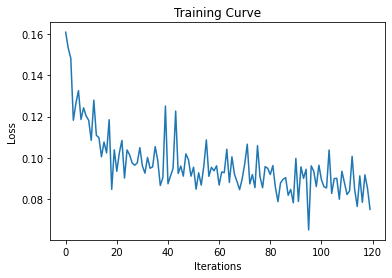

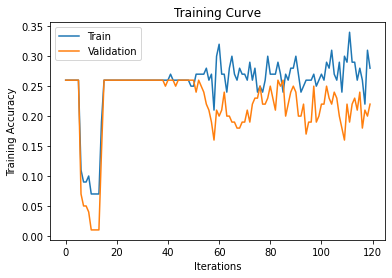

Final Training Accuracy: 0.28
Final Validation Accuracy: 0.22


In [64]:
#omg what happened here
test_model_2 = CNN(len(countries))
if use_cuda and torch.cuda.is_available():
  test_model_2.cuda()
  print("CUDA available, training on GPU")

train_subset(test_model_2, subset_train_dataset, subset_valid_dataset,batch_size=30,learning_rate=0.001,num_epochs=30)